# 1. Import Library

In [113]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read Data

In [114]:
data = pd.read_csv("penguins_size.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


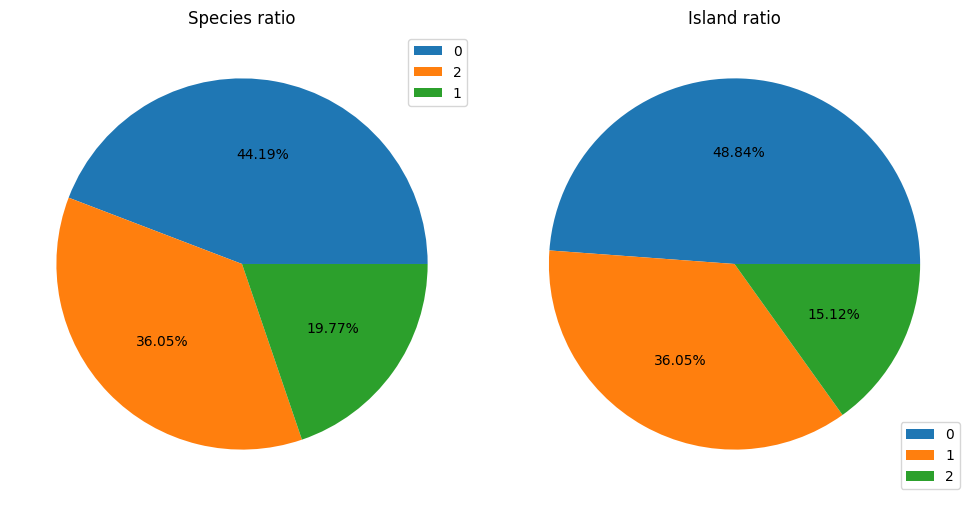

In [127]:
cats = ["species", "island"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for i in range(2):
    counts = data[cats[i]].value_counts()
    axes[i].pie(counts, autopct="%0.2f%%")
    axes[i].legend(counts.index)
    axes[i].set_title(cats[i].capitalize()+" ratio")

plt.tight_layout()
plt.show()


# 3. Preprocessing Data

In [116]:
coloums = ['species', 'island', 'sex']

for col in coloums :
    print(data[col].unique())


['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' nan '.']


In [117]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [118]:
data["culmen_length_mm"].fillna(data["culmen_length_mm"].median(), inplace=True)
data["culmen_depth_mm"].fillna(data["culmen_depth_mm"].median(), inplace=True)
data["flipper_length_mm"].fillna(data["flipper_length_mm"].median(), inplace=True)
data["body_mass_g"].fillna(data["body_mass_g"].median(), inplace=True)

In [119]:
adelie_sex = data[data["species"] == "Adelie"]["sex"].mode()
data.loc[(data["species"] == "Adelie") & (data["sex"].isna()), "sex"] = adelie_sex[0]

gentoo_sex = data[data["species"] == "Gentoo"]["sex"].mode()
data.loc[(data["species"] == "Gentoo") & (data["sex"].isna()), "sex"] = gentoo_sex[0]
data.loc[(data["species"] == "Gentoo") & (data["sex"] == '.'), "sex"] = gentoo_sex[0]

In [120]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [121]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,FEMALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,4050.0,MALE
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,FEMALE


# 4. Encoding Data & Scalling Data


In [122]:
categorical = ["species", "island", "sex"]
le = LabelEncoder()
for i in categorical:
    data[i] = le.fit_transform(data[i])

data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,0
4,0,2,36.70,19.3,193.0,3450.0,0
...,...,...,...,...,...,...,...
339,2,0,44.45,17.3,197.0,4050.0,1
340,2,0,46.80,14.3,215.0,4850.0,0
341,2,0,50.40,15.7,222.0,5750.0,1
342,2,0,45.20,14.8,212.0,5200.0,0


In [123]:
x = data.iloc[:, 1:].values     # Feature 
y = data.iloc[:, 0].values      # Label

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# 5. Spliting Data & Model Random Forrest

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        21

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



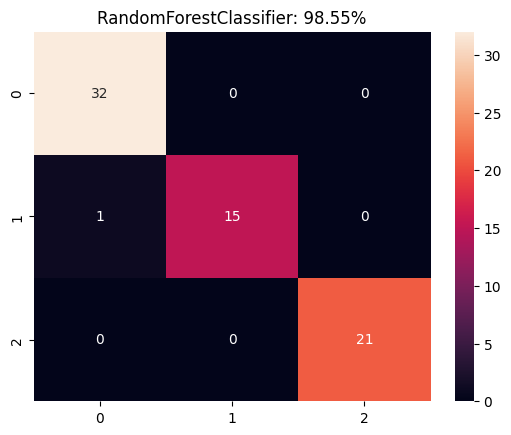

In [125]:
name = "RandomForestClassifier"
model = RandomForestClassifier()

model.fit(x_train, y_train)
pred = model.predict(x_test)
score = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)
cm = confusion_matrix(y_test, pred)
print(report)
sns.heatmap(cm, annot=True)
plt.title("{}: {}%".format(name, round(score*100, 2)))
plt.show()
